<a href="https://colab.research.google.com/github/hitanshu5/DeepLearning/blob/main/CustomerChurnModellingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip setuptools

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-72.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-72.1.0-py3-none-any.whl (2.3 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [2]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
print(tf.__version__)

Exception ignored in: <function _xla_gc_callback at 0x7b982ab64d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


2.17.0


In [8]:
# import some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [10]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [14]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
X=X.drop(['Geography','Gender'],axis=1)

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [17]:
X = pd.concat([X,geography,gender],axis=1)

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [23]:
X_train.shape

(8000, 11)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [25]:
#to initialize an ANN

classifier = Sequential()

In [26]:
#adding the input layer
classifier.add(Dense(units=11,activation='relu'))

#11 is the number of inputs

In [27]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

#7 is the number of neurons in the particular hidden layer

In [28]:
#adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

#6 is the number of neurons in the particular hidden layer

In [29]:
#adding output layer
classifier.add(Dense(1,activation='sigmoid'))

#1 is the number of neurons required

In [30]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Adam automatically considers its learning rate

In [31]:
# to specify learning rate on our own
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [32]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

#here in optimizer we use opt(with new LR) instead of adam

In [33]:
#Early Stopping

import tensorflow as tf
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [34]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=[early_stopping])

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7926 - loss: 0.5245 - val_accuracy: 0.8114 - val_loss: 0.4328
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8168 - loss: 0.4456 - val_accuracy: 0.8254 - val_loss: 0.4216
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8144 - loss: 0.4449 - val_accuracy: 0.8387 - val_loss: 0.3965
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8281 - loss: 0.4077 - val_accuracy: 0.8436 - val_loss: 0.3773
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8346 - loss: 0.3901 - val_accuracy: 0.8425 - val_loss: 0.3753
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8339 - loss: 0.3895 - val_accuracy: 0.8281 - val_loss: 0.3926
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8406 - loss: 0.3852 - val_accuracy: 0.8417 - val_loss: 0.3816
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8311 - loss: 0.3967 - 

In [35]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

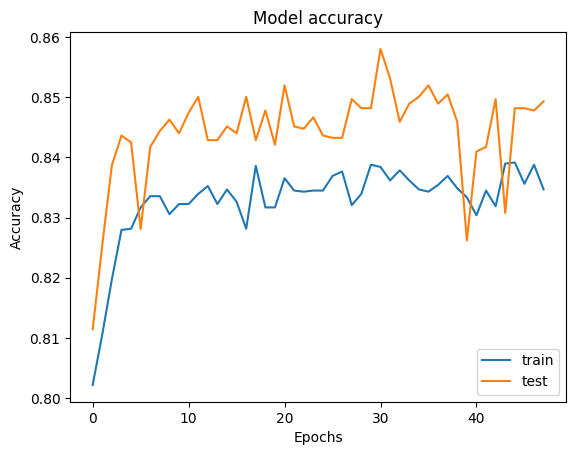

In [36]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='lower right')
plt.show()

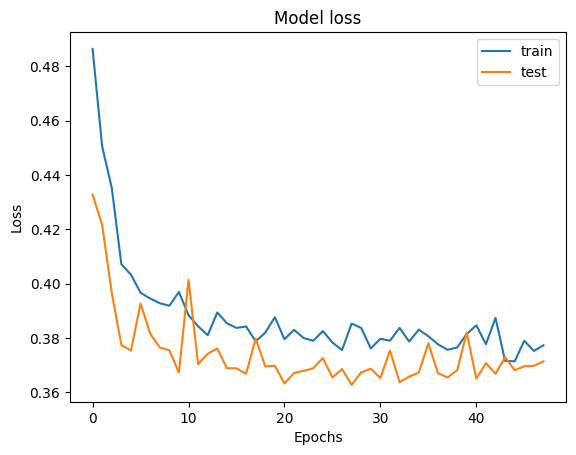

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [38]:
#making predictions and evaluating the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
#make confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1560,   35],
       [ 246,  159]])

In [40]:
#calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8595

In [41]:
#get the weights

classifier.get_weights()

[array([[ 2.4575220e-01,  3.0253628e-01, -5.5567676e-01,  5.5204824e-02,
         -5.2801663e-01,  1.7216578e-01,  3.2007164e-01, -7.4866615e-02,
          6.2814033e-01, -4.2886925e-01, -2.7512746e-02],
        [-4.3144676e-01, -4.1954663e-01, -1.5867244e+00,  2.4700501e+00,
          4.7444409e-01,  1.2948629e-01,  8.5347906e-02, -2.9512305e+00,
         -2.0301933e+00,  3.2414978e+00,  1.1190710e+00],
        [-1.0184799e-01,  1.0754300e+00, -7.9236114e-01, -6.5749437e-02,
          7.4065840e-01, -3.4913155e-01,  4.3634176e-01, -3.5962602e-01,
          1.0966139e+00, -5.6816238e-01, -9.8640583e-03],
        [-3.4036195e-01, -9.8339808e-01,  1.7560015e+00, -3.2076153e-01,
         -3.0193858e+00, -2.6719778e+00, -3.5316327e+00, -9.1378087e-01,
         -2.2005317e+00,  1.3514270e-01,  6.8550164e-01],
        [-6.9809845e-03,  7.5399965e-01,  7.4478048e-01,  2.1810645e-01,
         -2.9662089e+00, -3.2914755e+00,  6.5182883e-01,  3.1741418e-02,
          1.7523985e-01, -1.8337326e+0